# Analysis of Black Friday Sales

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [23]:
sales_data = pd.read_csv("/home/jovyan/Downloads/BlackFriday.csv")

## Step 1 - Preprocessing Steps

In [24]:
sales_data.count()

User_ID                       537577
Product_ID                    537577
Gender                        537577
Age                           537577
Occupation                    537577
City_Category                 537577
Stay_In_Current_City_Years    537577
Marital_Status                537577
Product_Category_1            537577
Product_Category_2            370591
Product_Category_3            164278
Purchase                      537577
dtype: int64

In [25]:
sales_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [26]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [27]:
##Examining columns with null values
sales_data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

##### Product_Category_2 & Product_Category_3 have null values

### 1.1 Replacing Missing Data and encoding categorical values

In [28]:
#Percentage of missing values in columns Product_Category_2 & Product_Category_3
sales_data.shape[0]

missing_data = sales_data.isnull().sum()

missing_data[missing_data>0]/sales_data.shape[0]*100

Product_Category_2    31.062713
Product_Category_3    69.441029
dtype: float64

In [29]:
# Replacing missing values with 0
sales_data = sales_data.fillna(0)

In [30]:
#Removing special symbols like + in 'Age' and 'Current City in Years'
sales_data['Age']=(sales_data['Age'].str.strip('+'))

#sales_data['Stay_In_Current_City_Years']=(sales_data['Stay_In_Current_City_Years'].str.strip('+')).astype('float')

In [31]:
##Uniqueness of Features
print('Number of Unique Values for Each Feature: \n')
for i in sales_data.columns:
    print(i, ':',sales_data[i].nunique())

Number of Unique Values for Each Feature: 

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 18
Product_Category_3 : 16
Purchase : 17959


In [33]:
sales_data['Gender']=sales_data['Gender'].astype('category')
sales_data['Age']=sales_data['Age'].astype('category')
sales_data['City_Category']=sales_data['City_Category'].astype('category')
sales_data['Stay_In_Current_City_Years']=sales_data['Stay_In_Current_City_Years'].astype('category')
sales_data['Marital_Status']=sales_data['Marital_Status'].astype('category')
sales_data['Occupation']=sales_data['Occupation'].astype('category')



sales_data['Gender']=pd.Categorical(sales_data['Gender']).codes
sales_data['Age']=pd.Categorical(sales_data['Age']).codes
sales_data['City_Category']=pd.Categorical(sales_data['City_Category']).codes
sales_data['Stay_In_Current_City_Years']=pd.Categorical(sales_data['Stay_In_Current_City_Years']).codes
sales_data['Marital_Status']=pd.Categorical(sales_data['Marital_Status']).codes
sales_data['Occupation']=pd.Categorical(sales_data['Occupation']).codes

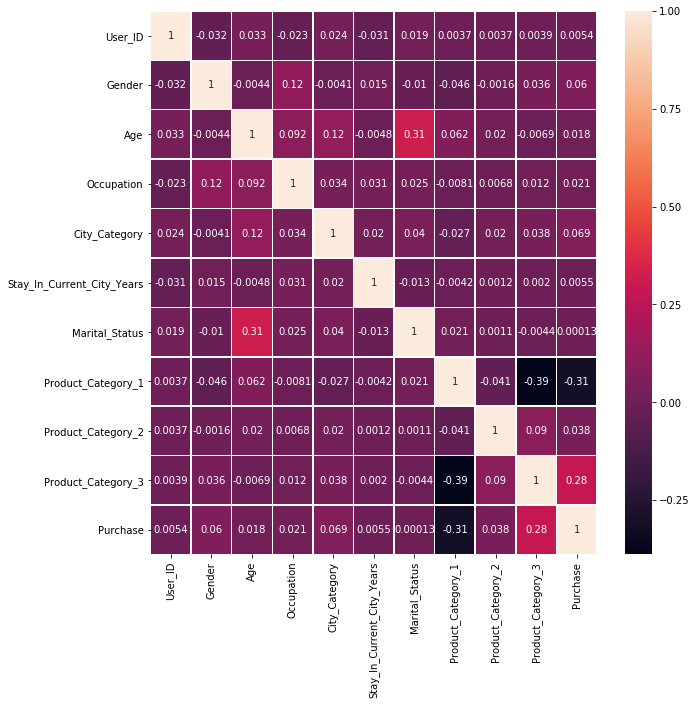

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(sales_data.corr(),annot=True,linewidths=.5, ax=ax)

In [ ]:
### Positive correlations between Purchase, C

In [129]:
df_sample = sales_data[0:50000]

In [51]:
sales_data[sales_data['Product_ID']=='P00025442']['Purchase'].describe()

count     1586.000000
mean     17359.663304
std       2932.299319
min       3961.000000
25%      15569.000000
50%      19086.000000
75%      19409.000000
max      19707.000000
Name: Purchase, dtype: float64

In [46]:
sales_data.loc[290190]

User_ID                         1002756
Product_ID                    P00025442
Gender                                M
Age                               18-25
Occupation                            4
City_Category                         C
Stay_In_Current_City_Years            2
Marital_Status                        0
Product_Category_1                    1
Product_Category_2                    2
Product_Category_3                    9
Purchase                          19465
Name: 290190, dtype: object

In [ ]:
check if the price is same for every city

In [54]:
sales_data['User_ID'].nunique()

5891

In [45]:
## Generating Output for Synthetic Dataset
sales_data[["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status", "Product_Category_1","Product_Category_3" ,"Purchase"]][0:50000].to_csv("sample_data_black_friday_sales.csv")

In [46]:
import os 
os.getcwd()

'/home/jovyan/aon-quoting'

## Facebook Prophet Model for Time Series Forecasting

In [78]:
sales_2018 = pd.read_csv('/home/jovyan/Hackathon/sample_data_black_friday_sales.csv')

In [79]:
sales_2017 = pd.read_csv('/home/jovyan/Hackathon/synthetic_data.csv')

In [80]:
sales_2018=sales_2018.drop(sales_2018.columns[0], axis=1)
sales_2018['year']='2018-11-23'

In [81]:
sales_2017=sales_2017.drop(sales_2017.columns[0:2], axis=1)
sales_2017['year']='2017-11-23'

In [82]:
sales_2017.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_3,Purchase,year
0,M,36-45,15,B,4,1,1,17,15279,2017-11-23
1,M,26-35,14,C,1,0,5,0,7155,2017-11-23
2,F,36-45,14,B,1,0,5,0,7138,2017-11-23
3,M,26-35,2,C,4,0,5,0,6995,2017-11-23
4,M,46-50,12,C,0,1,1,0,15396,2017-11-23


In [83]:
sales_2018.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_3,Purchase,year
0,F,0-17,10,A,2.0,0,3,0.0,8370,2018-11-23
1,F,0-17,10,A,2.0,0,1,14.0,15200,2018-11-23
2,F,0-17,10,A,2.0,0,12,0.0,1422,2018-11-23
3,F,0-17,10,A,2.0,0,12,0.0,1057,2018-11-23
4,M,55,16,C,4.0,0,8,0.0,7969,2018-11-23


In [84]:
!pip install fbprophet

    100% |████████████████████████████████| 50.0MB 189kB/s 
  Running setup.py bdist_wheel for fbprophet ... error
  Complete output from command /opt/conda/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-j424fjuq/fbprophet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-1axx873p --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-j424fjuq/fbprophet/setup.py", line 123, in <module>
      """
    File "/opt/conda/lib/python3.6/site-packages/setuptools/__init__.py", line 131, in setup
      return distutils.core.setup(**attrs)
    File "/opt/conda/lib/python3.6/distutils/core.py", line 148, in setup
      dis

In [90]:
sales_data = pd.concat([sales_2017,sales_2018])

In [96]:
df=sales_data[['year','Purchase']]

In [101]:
df =df.rename(index=str, columns={"year": "ds", "Purchase": "y"})

In [103]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
100360,2019-11-19
100361,2019-11-20
100362,2019-11-21
100363,2019-11-22
100364,2019-11-23


In [105]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
100360,2019-11-19,9279.610714,2357.125677,15904.984223
100361,2019-11-20,9279.614639,2443.793827,16189.580617
100362,2019-11-21,9279.618563,2943.671434,16012.527631
100363,2019-11-22,9279.622487,2364.163766,15892.279259
100364,2019-11-23,9279.626412,2483.771574,16059.609010


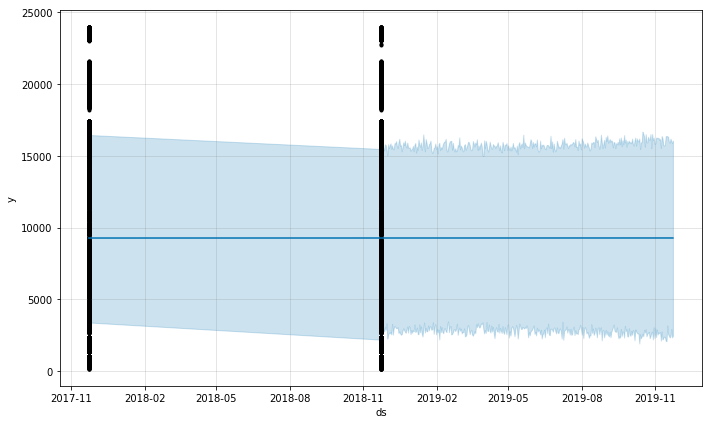

In [106]:
# Python
fig1 = m.plot(forecast)


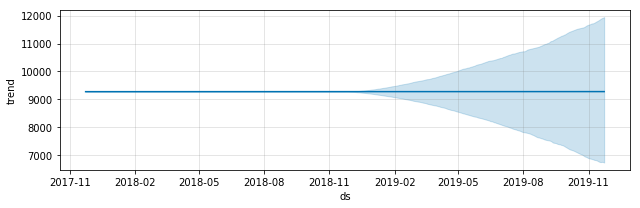

In [107]:
# Python
fig2 = m.plot_components(forecast)

## Linear Models to predict the purchase price of customers based on existing features

In [16]:
import pandas as pd
sales_data = pd.read_csv("/home/jovyan/Downloads/BlackFriday.csv")
sales_data = sales_data.fillna(0)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [18]:
df_sample = sales_data[0:10000]

df_sample.count()

User_ID                       10000
Product_ID                    10000
Gender                        10000
Age                           10000
Occupation                    10000
City_Category                 10000
Stay_In_Current_City_Years    10000
Marital_Status                10000
Product_Category_1            10000
Product_Category_2            10000
Product_Category_3            10000
Purchase                      10000
dtype: int64

In [19]:
df_sample['Gender']=df_sample['Gender'].astype('category')
df_sample['Age']=df_sample['Age'].astype('category')
df_sample['City_Category']=df_sample['City_Category'].astype('category')
df_sample['Stay_In_Current_City_Years']=df_sample['Stay_In_Current_City_Years'].astype('category')
df_sample['Marital_Status']=df_sample['Marital_Status'].astype('category')
df_sample['Occupation']=df_sample['Occupation'].astype('category')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [20]:
labels = df_sample['Purchase']

In [21]:
predictor_columns = ["Gender", "Occupation", "City_Category", "Marital_Status", "Product_Category_1","Product_Category_2", "Product_Category_3"]
#train = pd.get_dummies(sales_data, columns = dummy, drop_first = True).values

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label = LabelEncoder()

df_sample["Gender"]= label.fit_transform(df_sample["Gender"])
df_sample["Age"]= label.fit_transform(df_sample["Age"])
df_sample["Occupation"]= label.fit_transform(df_sample["Occupation"])
df_sample["Marital_Status"]= label.fit_transform(df_sample["Marital_Status"])
df_sample["City_Category"]= label.fit_transform(df_sample["City_Category"])
#train[:,1] = label1.fit_transform(train[:,1])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [23]:
df_sample_predictors = df_sample[predictor_columns]

In [24]:
df_sample_predictors.head()

,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,10,0,0,3,0.0,0.0
1,0,10,0,0,1,6.0,14.0
2,0,10,0,0,12,0.0,0.0
3,0,10,0,0,12,14.0,0.0
4,1,16,2,0,8,0.0,0.0


In [25]:
scale = StandardScaler()
df_sample_predictors_scaled = scale.fit_transform(df_sample_predictors)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
len(df)

10000

In [27]:
##From the correlation matrix obtained from EDA, looks like there is a strong correlation between Purchase

In [28]:
x_train , x_test , y_train , y_test = train_test_split(df_sample_predictors_scaled, labels , test_size = 0.10,random_state =2)

In [29]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, explained_variance_score

In [18]:
from sklearn import ensemble

In [202]:
# # compare MAE with differing values of max_leaf_nodes
# def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
#     model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mae = mean_absolute_error(y_test,y_pred)
#     evs = explained_variance_score(y_test, y_pred, multioutput='uniform_average')
#     mse = mean_squared_error(y_test, y_pred)  
#     return mae,evs, mse
# for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850,1000]:
#     my_mae,my_evs, mse = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
#     print((max_leaf_nodes, my_mae, my_evs, mse))

In [30]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [32]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [33]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Average Error: 2379.4976 degrees.
Accuracy = 63.58%.


In [34]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance
Average Error: 2203.7802 degrees.
Accuracy = 65.26%.


In [35]:
regressor = RandomForestRegressor(n_estimators= 200,min_samples_split=5,min_samples_leaf=4,max_features='auto',max_depth=10,bootstrap= True)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [37]:
list(zip(y_pred,y_test))[0:100]

[(5976.390105009715, 3498),
 (14111.021456561219, 11452),
 (10077.891793481038, 8036),
 (7728.222419605273, 6189),
 (11661.47233201421, 13200),
 (2111.1422945121403, 2184),
 (7597.85997246688, 9829),
 (7544.576025472322, 7860),
 (13883.948876946302, 15888),
 (6023.924873375368, 7066),
 (6074.742636321433, 7127),
 (7770.273692366317, 7886),
 (6494.4913132335605, 5149),
 (14093.090426843497, 11678),
 (6285.971904799944, 5479),
 (14399.990881904267, 19112),
 (7850.9188579248075, 7859),
 (6364.786700460502, 7052),
 (12558.495235512259, 15223),
 (6254.224832991023, 6882),
 (11551.17367730731, 8340),
 (6498.305559814089, 8593),
 (2758.3968369873583, 2314),
 (13185.175652950778, 8294),
 (7543.669750040699, 9735),
 (16092.717136305306, 16565),
 (7383.740948842647, 6158),
 (7302.798389294928, 7763),
 (5828.709374367019, 1753),
 (5876.664912192612, 7009),
 (5991.549129807285, 7091),
 (15258.663493400092, 8657),
 (1448.624618676046, 1714),
 (7590.789170347802, 8128),
 (7616.933012631784, 6021),
 

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test,y_pred)
evs = explained_variance_score(y_test, y_pred, multioutput='uniform_average')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [44]:
mae,evs,mse,r2

(2203.1357779332816, 0.651347799973375, 8376350.801875967, 0.6510405695922488)

In [45]:
from sklearn.tree import export_graphviz

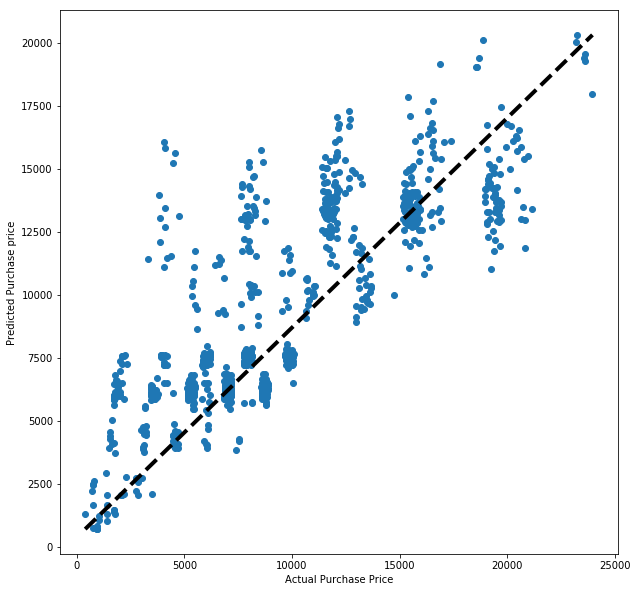

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual Purchase Price')
ax.set_ylabel('Predicted Purchase price')
plt.show()